In [19]:
%load_ext autoreload
%autoreload 2
from src.df_datasets import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
warpdataset = WarpDataset(body_seg_dir='data/deep_fashion/body',
                         cloth_seg_dir='data/deep_fashion/clothing',
                         input_transform=swapnet_per_channel_transform)

In [10]:
# os.makedirs('data/deep_fashion/body/MEN/Pants/id_00007323/')
# a = np.random.randint(0,256, (20,20,3), dtype=np.uint8)
# a = Image.fromarray(a)
# a.save('data/deep_fashion/body/MEN/Pants/id_00007323/04_2_size.png', 'PNG')
from scipy.sparse import load_npz
a = load_npz('data/deep_fashion/clothing/WOMEN/Tees_Tanks/id_00000007/01_1_front.npz')
np.unique(a.todense().tolist())

array([ 0,  2,  4, 11, 12, 13, 14, 15, 16])

In [65]:
input_body, input_cloth, target_cloth = warpdataset[1]

MEN/Pants/id_00007323/04_2_side.png WOMEN/Tees_Tanks/id_00000007/01_1_front.npz MEN/Pants/id_00007323/04_2_side.npz
(256, 256, 19)


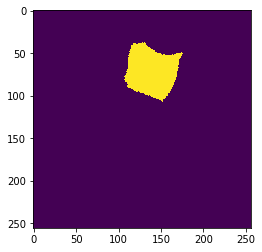

In [66]:
plt.imshow(input_cloth[:,:,4])

In [58]:
texturedataset = TextureDataset(texture_dir='data/deep_fashion/texture',
                                 cloth_seg_dir='data/deep_fashion/clothing',
                                rois_db='data/deep_fashion/rois.csv'
                               )
len(texturedataset)

52712

In [59]:
input_texture_tensor, input_rois_tensor, input_cloth_tensor, output_texture_tensor = texturedataset[0]

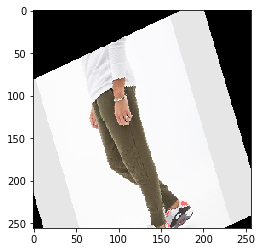

In [62]:
def show(img):
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
show(input_texture_tensor)

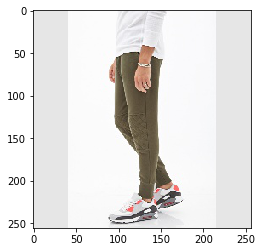

In [63]:
show(output_texture_tensor)